In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy import stats
import pylab
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [ ]:

test = pd.read_csv('HE/Pet_adoption/test.csv')
train = pd.read_csv('HE/Pet_adoption/train.csv')


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
condition,17357.0,0.883390,0.770434,0.0,0.0000,1.00,1.00,2.0
length(m),18834.0,0.502636,0.288705,0.0,0.2500,0.50,0.76,1.0
height(cm),18834.0,27.448832,13.019781,5.0,16.1725,27.34,38.89,50.0
X1,18834.0,5.369598,6.572366,0.0,0.0000,0.00,13.00,19.0
X2,18834.0,4.577307,3.517763,0.0,1.0000,4.00,9.00,9.0
breed_category,18834.0,0.600563,0.629883,0.0,0.0000,1.00,1.00,2.0
pet_category,18834.0,1.709143,0.717919,0.0,1.0000,2.00,2.00,4.0


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [ ]:
train.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64


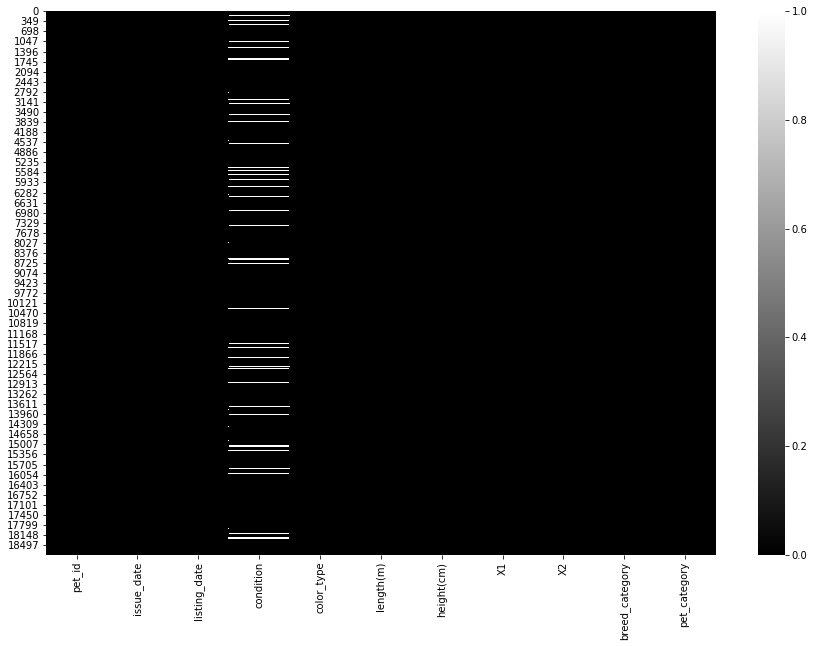

In [ ]:
print(train.isnull().sum())
plt.figure(figsize = (15,10))
sns.heatmap(train.isnull(),cmap='gray')

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64


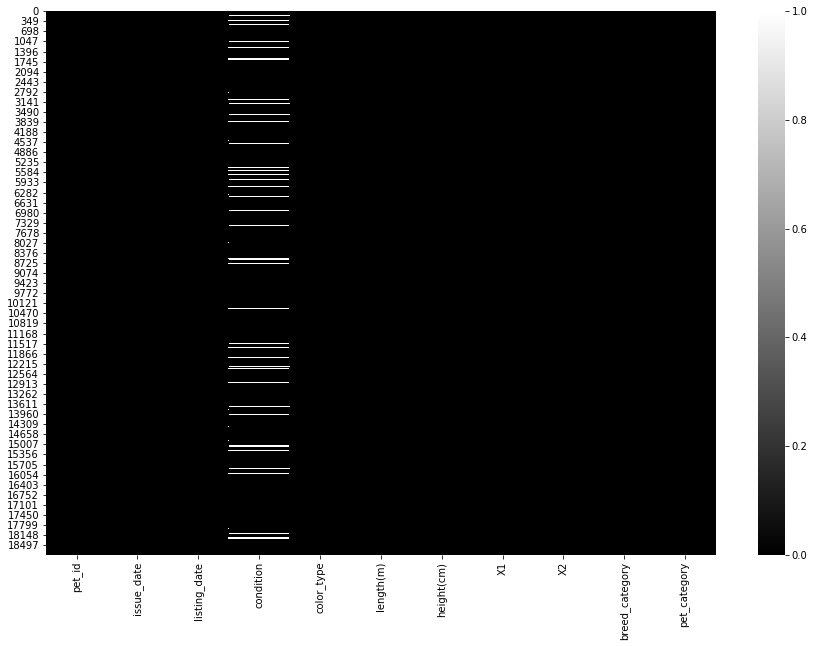

In [ ]:
print(test.isnull().sum())
plt.figure(figsize = (15,10))
sns.heatmap(train.isnull(),cmap='gray')

In [ ]:
train.groupby('condition').mean()

,length(m),height(cm),X1,X2,breed_category,pet_category
condition,,,,,,
0.0,0.505816,27.670675,3.247731,3.424455,1.000000,1.631269
1.0,0.502157,27.278102,3.220414,3.723127,0.000000,1.682065
2.0,0.497324,27.340665,9.245478,7.201081,0.487667,1.559549


In [ ]:
train.groupby('breed_category').mean()

,condition,length(m),height(cm),X1,X2,pet_category
breed_category,,,,,,
0.0,1.242333,0.500540,27.274660,4.560111,4.544444,1.656778
1.0,0.496829,0.504187,27.608730,4.867297,4.385784,1.608711
2.0,NaN,0.506628,27.605423,13.144211,5.861205,2.596479


Since all the NaN values representing breed category as 2.0, we will be using a new category as 5.0

In [ ]:
# Creating a new condition
train['condition'] = train['condition'].fillna(int(5))
test['condition'] = test['condition'].fillna(int(5))

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64


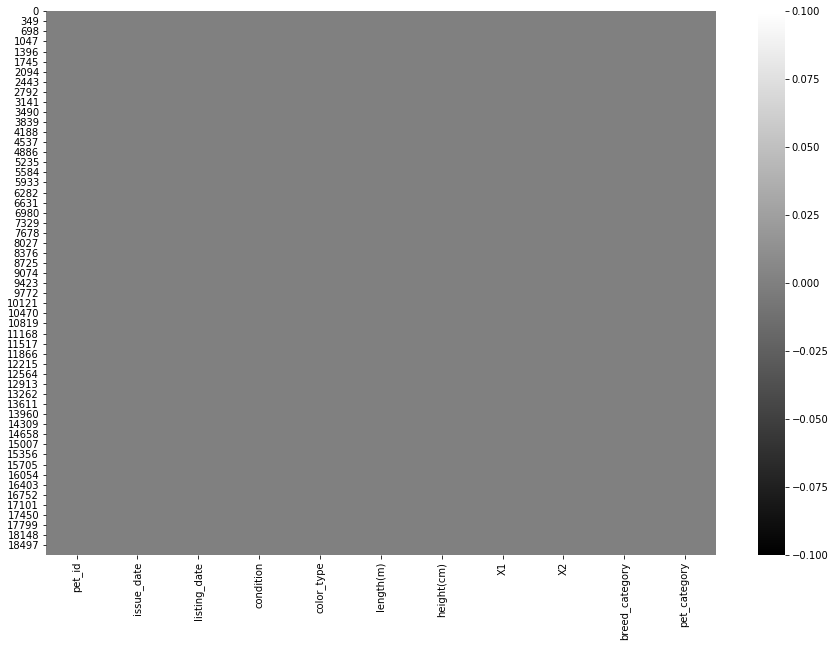

In [ ]:
print(train.isnull().sum())
plt.figure(figsize = (15,10))
sns.heatmap(train.isnull(),cmap='gray')

pet_id          0
issue_date      0
listing_date    0
condition       0
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64


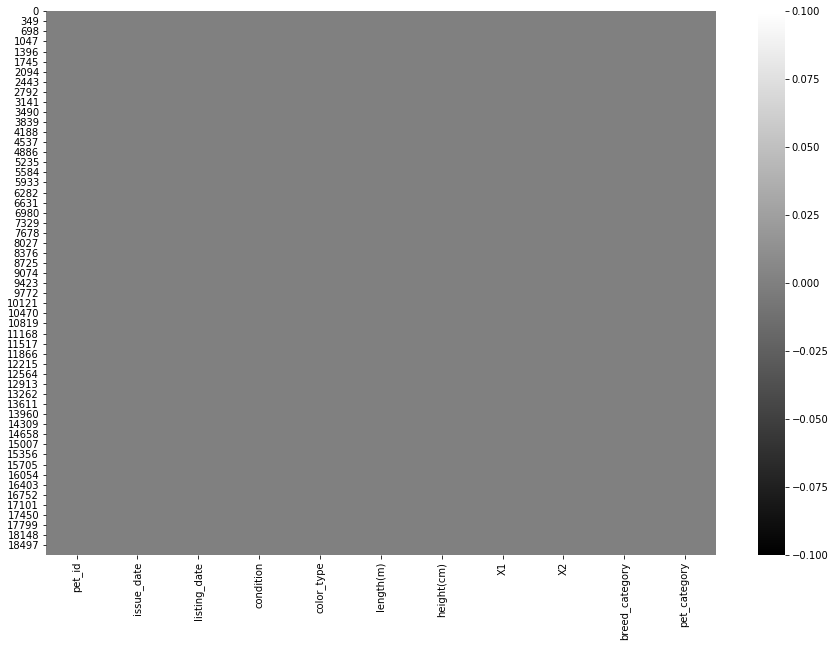

In [ ]:
print(test.isnull().sum())
plt.figure(figsize = (15,10))
sns.heatmap(train.isnull(),cmap='gray')

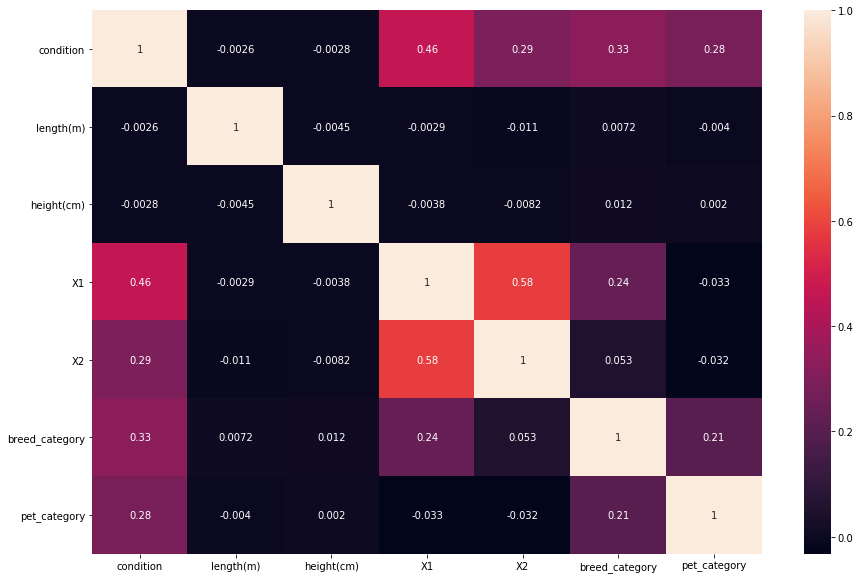

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), annot = True)

Listing date should not be issue date. Let's check it!!!

In [ ]:
train.loc[train['listing_date'] < train['issue_date']] #2 Anamolies

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
1504,ANSL_52243,2018-01-17 00:00:00,2018-01-14 15:13:00,2.0,Orange Tabby,0.72,43.19,13,9,0.0,1
5301,ANSL_63737,2016-11-18 00:00:00,2016-09-03 17:01:00,0.0,Black,0.88,27.82,0,1,1.0,1


In [ ]:
test.loc[test['listing_date'] < test['issue_date']] #0 Anamolies

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2


train contains 2 anamolies and test 0, Let's remove them!!!

In [ ]:
train = train.loc[train['listing_date'] >= train['issue_date']]
# test = test.loc[test['listing_date'] >= test['issue_date']]

Let us get the more feature from listing date and issue date!!!

In [ ]:

train['issue_date_Year'] = train['issue_date'].apply(lambda x: int(x[:4]))
train['issue_date_Month'] = pd.to_datetime(train['issue_date']).dt.month
train['issue_date_Day'] = pd.to_datetime(train['issue_date']).dt.day
train['issue_date_Dayofweek'] = pd.to_datetime(train['issue_date']).dt.dayofweek
train['issue_date_DayOfyear'] = pd.to_datetime(train['issue_date']).dt.dayofyear
train['issue_date_Week_No'] = pd.to_datetime(train['issue_date']).dt.week
train['issue_date_Quarter'] = pd.to_datetime(train['issue_date']).dt.quarter 
train['issue_date_Is_month_start'] = pd.to_datetime(train['issue_date']).dt.is_month_start
train['issue_date_Is_month_end'] = pd.to_datetime(train['issue_date']).dt.is_month_end
train['issue_date_Is_quarter_start'] = pd.to_datetime(train['issue_date']).dt.is_quarter_start
train['issue_date_Is_quarter_end'] = pd.to_datetime(train['issue_date']).dt.is_quarter_end
train['issue_date_Is_year_start'] = pd.to_datetime(train['issue_date']).dt.is_year_start
train['issue_date_Is_year_end'] = pd.to_datetime(train['issue_date']).dt.is_year_end
train['issue_date_Is_weekend'] = np.where(train['issue_date_Dayofweek'].isin([5,6]),1,0)
train['issue_date_Is_weekday'] = np.where(train['issue_date_Dayofweek'].isin([0,1,2,3,4]),1,0)


train['listing_date_Year'] = train['listing_date'].apply(lambda x: int(x[:4]))
train['listing_date_Month'] = pd.to_datetime(train['listing_date']).dt.month
train['listing_date_Day'] = pd.to_datetime(train['listing_date']).dt.day
train['listing_date_Dayofweek'] = pd.to_datetime(train['listing_date']).dt.dayofweek
train['listing_date_DayOfyear'] = pd.to_datetime(train['listing_date']).dt.dayofyear
train['listing_date_Week_No'] = pd.to_datetime(train['listing_date']).dt.week
train['listing_date_Quarter'] = pd.to_datetime(train['listing_date']).dt.quarter 
train['listing_date_Is_month_start'] = pd.to_datetime(train['listing_date']).dt.is_month_start
train['listing_date_Is_month_end'] = pd.to_datetime(train['listing_date']).dt.is_month_end
train['listing_date_Is_quarter_start'] = pd.to_datetime(train['listing_date']).dt.is_quarter_start
train['listing_date_Is_quarter_end'] = pd.to_datetime(train['listing_date']).dt.is_quarter_end
train['listing_date_Is_year_start'] = pd.to_datetime(train['listing_date']).dt.is_year_start
train['listing_date_Is_year_end'] = pd.to_datetime(train['listing_date']).dt.is_year_end
train['listing_date_Is_weekend'] = np.where(train['issue_date_Dayofweek'].isin([5,6]),1,0)
train['listing_date_Is_weekday'] = np.where(train['issue_date_Dayofweek'].isin([0,1,2,3,4]),1,0)


In [ ]:

test['issue_date_Year'] = test['issue_date'].apply(lambda x: int(x[:4]))
test['issue_date_Month'] = pd.to_datetime(test['issue_date']).dt.month
test['issue_date_Day'] = pd.to_datetime(test['issue_date']).dt.day
test['issue_date_Dayofweek'] = pd.to_datetime(test['issue_date']).dt.dayofweek
test['issue_date_DayOfyear'] = pd.to_datetime(test['issue_date']).dt.dayofyear
test['issue_date_Week_No'] = pd.to_datetime(test['issue_date']).dt.week
test['issue_date_Quarter'] = pd.to_datetime(test['issue_date']).dt.quarter 
test['issue_date_Is_month_start'] = pd.to_datetime(test['issue_date']).dt.is_month_start
test['issue_date_Is_month_end'] = pd.to_datetime(test['issue_date']).dt.is_month_end
test['issue_date_Is_quarter_start'] = pd.to_datetime(test['issue_date']).dt.is_quarter_start
test['issue_date_Is_quarter_end'] = pd.to_datetime(test['issue_date']).dt.is_quarter_end
test['issue_date_Is_year_start'] = pd.to_datetime(test['issue_date']).dt.is_year_start
test['issue_date_Is_year_end'] = pd.to_datetime(test['issue_date']).dt.is_year_end
test['issue_date_Is_weekend'] = np.where(test['issue_date_Dayofweek'].isin([5,6]),1,0)
test['issue_date_Is_weekday'] = np.where(test['issue_date_Dayofweek'].isin([0,1,2,3,4]),1,0)
    
    
test['listing_date_Year'] = test['listing_date'].apply(lambda x: int(x[:4]))
test['listing_date_Month'] = pd.to_datetime(test['listing_date']).dt.month
test['listing_date_Day'] = pd.to_datetime(test['listing_date']).dt.day
test['listing_date_Dayofweek'] = pd.to_datetime(test['listing_date']).dt.dayofweek
test['listing_date_DayOfyear'] = pd.to_datetime(test['listing_date']).dt.dayofyear
test['listing_date_Week_No'] = pd.to_datetime(test['listing_date']).dt.week
test['listing_date_Quarter'] = pd.to_datetime(test['listing_date']).dt.quarter 
test['listing_date_Is_month_start'] = pd.to_datetime(test['listing_date']).dt.is_month_start
test['listing_date_Is_month_end'] = pd.to_datetime(test['listing_date']).dt.is_month_end
test['listing_date_Is_quarter_start'] = pd.to_datetime(test['listing_date']).dt.is_quarter_start
test['listing_date_Is_quarter_end'] = pd.to_datetime(test['listing_date']).dt.is_quarter_end
test['listing_date_Is_year_start'] = pd.to_datetime(test['listing_date']).dt.is_year_start
test['listing_date_Is_year_end'] = pd.to_datetime(test['listing_date']).dt.is_year_end
test['listing_date_Is_weekend'] = np.where(test['issue_date_Dayofweek'].isin([5,6]),1,0)
test['listing_date_Is_weekday'] = np.where(test['issue_date_Dayofweek'].isin([0,1,2,3,4]),1,0)


In [ ]:
train['diff_date']= train['listing_date_Day'] - train['issue_date_Day']
test['diff_date']= test['listing_date_Day'] - test['issue_date_Day']

In [ ]:
train['diff_month']= train['listing_date_Month'] - train['issue_date_Month']
test['diff_month']= test['listing_date_Month'] - test['issue_date_Month']

In [ ]:
train['diff_year'] = train['listing_date_Year'] - train['issue_date_Year']
test['diff_year'] = test['listing_date_Year'] - test['issue_date_Year']

In [ ]:
train.drop(['issue_date','listing_date'], axis = 1, inplace=True)
test.drop(['issue_date','listing_date'], axis = 1, inplace=True)

Let's convert length and height in same units of 'cm'

In [ ]:
train['length(cm)'] = train['length(m)']*100
test['length(cm)'] = test['length(m)']*100
train.drop(['length(m)'], axis = 1, inplace=True)
test.drop(['length(m)'], axis = 1, inplace=True)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
condition,18832.0,1.206245,1.331133,0.0,0.00,1.000,2.00,5.0
height(cm),18832.0,27.447977,13.019967,5.0,16.17,27.335,38.89,50.0
X1,18832.0,5.369477,6.572364,0.0,0.00,0.000,13.00,19.0
X2,18832.0,4.577262,3.517706,0.0,1.00,4.000,9.00,9.0
breed_category,18832.0,0.600573,0.629894,0.0,0.00,1.000,1.00,2.0
pet_category,18832.0,1.709218,0.717920,0.0,1.00,2.000,2.00,4.0
issue_date_Year,18832.0,2015.079917,3.103226,1994.0,2014.00,2016.000,2017.00,2019.0
issue_date_Month,18832.0,6.824607,3.300548,1.0,4.00,7.000,10.00,12.0
issue_date_Day,18832.0,15.750106,8.798779,1.0,8.00,16.000,23.00,31.0
issue_date_Dayofweek,18832.0,3.011151,2.015469,0.0,1.00,3.000,5.00,6.0


Let us get the more feature from length and height !!!

length and height can not be less than 0. Let's verify it!!!

In [ ]:
print(len(train[train['length(cm)'] == 0]))
print(len(test[test['length(cm)'] == 0]))

93
44


In [ ]:
print(len(train[train['height(cm)'] == 0]))
print(len(test[test['height(cm)'] == 0]))

0
0


Imputing mean values for length as 0

In [ ]:
val1 = train['length(cm)'].mean()
val2 = test['length(cm)'].mean()
train['length(cm)'] = train['length(cm)'].replace(to_replace=0, value=val1)
test['length(cm)'] = test['length(cm)'].replace(to_replace=0, value=val2)

creating groups from length and height values ratio and product features!!!

In [ ]:

def calc_len(x):
    if x <= 20:
        return 201
    elif x <= 40:
        return 301
    elif x <= 60:
        return 401
    elif x <= 80:
        return 501
    elif x <= 100:
        return 601
        
train['length(cm)_group'] = pd.Series()
test['length(cm)_group'] = pd.Series()
train['length(cm)_group'] = train['length(cm)'].apply(lambda x: calc_len(x))
test['length(cm)_group'] = test['length(cm)'].apply(lambda x: calc_len(x))


C:\Users\Balaji\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]
C:\Users\Balaji\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:

def calc_ht(x):
    if x <= 15:
        return 61
    elif x <= 25:
        return 62
    elif x <= 35:
        return 63
    elif x <= 45:
        return 64
    elif x <= 55:
        return 65

train['height(cm)_group'] = pd.Series()
test['height(cm)_group'] = pd.Series()
train['height(cm)_group'] = train['height(cm)'].apply(lambda x: calc_ht(x))
test['height(cm)_group'] = test['height(cm)'].apply(lambda x: calc_ht(x))


train['ratio_len_height'] = train['length(cm)']/train['height(cm)']
test['ratio_len_height'] = test['length(cm)']/test['height(cm)']

train['ratio_x_height'] = train['length(cm)']*train['height(cm)']
test['ratio_x_height'] = test['length(cm)']*test['height(cm)']

C:\Users\Balaji\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]
C:\Users\Balaji\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
train.head()

,pet_id,condition,color_type,height(cm),X1,X2,breed_category,pet_category,issue_date_Year,issue_date_Month,...,listing_date_Is_weekend,listing_date_Is_weekday,diff_date,diff_month,diff_year,length(cm),length(cm)_group,height(cm)_group,ratio_len_height,ratio_x_height
0,ANSL_69903,2.0,Brown Tabby,7.78,13,9,0.0,1,2016,7,...,1,0,11,2,0,80.0,501,61,10.282776,622.40
1,ANSL_66892,1.0,White,14.19,13,9,0.0,2,2013,11,...,0,1,6,1,5,72.0,501,61,5.073996,1021.68
2,ANSL_69750,5.0,Brown,40.90,15,4,2.0,4,2014,9,...,1,0,-9,1,2,15.0,201,64,0.366748,613.50
3,ANSL_71623,1.0,White,17.82,0,1,0.0,2,2016,12,...,1,0,-6,-11,3,62.0,501,62,3.479237,1104.84
4,ANSL_57969,2.0,Black,11.06,18,4,0.0,1,2017,9,...,0,1,-9,2,0,50.0,401,61,4.520796,553.00


Let's get insights from color_type features

In [ ]:
print(train['color_type'].nunique())
print(test['color_type'].nunique())

56
54


In [ ]:
# 2 values are not matched, let's see which those values are
set(train.color_type) - set(test.color_type)

{'Black Tiger', 'Brown Tiger'}

In [ ]:
# Imputing probability (mean) values for color_type with respect to pet category and breed category!!!

pet_Cat = dict(train.groupby('color_type').mean()['pet_category'])
train['color_pet_cat'] = train['color_type'].map(pet_Cat)
pet_Cat2 = dict(train.groupby('color_type').mean()['pet_category'])
test['color_pet_cat'] = test['color_type'].map(pet_Cat2)


breed_Cat = dict(train.groupby('color_type').mean()['breed_category'])
train['color_breed_Cat'] = train['color_type'].map(breed_Cat)
breed_Cat2 = dict(train.groupby('color_type').mean()['breed_category'])
test['color_breed_Cat'] = test['color_type'].map(breed_Cat2)


train.drop(['color_type'], axis = 1, inplace=True)
test.drop(['color_type'], axis = 1, inplace=True)

Let us get the more insights from feature pet_id !!!

In [ ]:
train['pet_id_1'] = train['pet_id'].apply(lambda x: int(x[5:6]))
train['pet_id_2'] = train['pet_id'].apply(lambda x: int(x[5:7]))

# I used more digits than 2, but it was more varying so decided to drop it.
# train['pet_id_3'] = train['pet_id'].apply(lambda x: int(x[5:8])) 
# train['pet_id_all'] = train['pet_id'].apply(lambda x: int(x[5:]))    

In [ ]:
test['pet_id_1'] = test['pet_id'].apply(lambda x: int(x[5:6]))
test['pet_id_2'] = test['pet_id'].apply(lambda x: int(x[5:7]))

In [ ]:
set(train.pet_id_2) - set(test.pet_id_2)

set()

In [ ]:
train.pet_id_1.value_counts()

6    7004
5    6998
7    4813
4      17
Name: pet_id_1, dtype: int64

In [ ]:
test.pet_id_1.value_counts()

5    3000
6    2995
7    2064
4      13
Name: pet_id_1, dtype: int64

In [ ]:
train.pet_id_2.value_counts().count()

28

In [ ]:
train.pet_id_2.value_counts()

61    739
70    715
60    714
52    713
55    712
59    708
58    708
73    708
72    705
62    703
51    702
67    702
56    700
54    699
63    699
57    699
75    699
64    699
66    695
65    692
68    691
50    689
74    682
71    677
69    670
53    668
76    627
49     17
Name: pet_id_2, dtype: int64

In [ ]:
test.pet_id_2.value_counts().count()

28

In [ ]:
test.pet_id_2.value_counts()

53    332
69    330
71    323
74    318
50    311
68    309
65    308
66    305
57    301
54    301
64    301
75    301
56    300
63    300
51    298
67    298
62    297
72    295
73    292
58    292
59    291
55    288
60    286
52    286
70    285
61    261
76    250
49     13
Name: pet_id_2, dtype: int64

In [ ]:
# Imputing probability (mean) values for features pet_id_1 and pet_id_2 with respect to pet category and breed category!!!

pet_Cat = dict(train.groupby('pet_id_1').mean()['pet_category'])
train['color_pet_id1'] = train['pet_id_1'].map(pet_Cat)
pet_Cat2 = dict(train.groupby('pet_id_1').mean()['pet_category'])
test['color_pet_id1'] = test['pet_id_1'].map(pet_Cat2)

breed_Cat = dict(train.groupby('pet_id_1').mean()['breed_category'])
train['color_breed_id1'] = train['pet_id_1'].map(breed_Cat)
breed_Cat2 = dict(train.groupby('pet_id_1').mean()['breed_category'])
test['color_breed_id1'] = test['pet_id_1'].map(breed_Cat2)


pet_Cat = dict(train.groupby('pet_id_2').mean()['pet_category'])
train['color_pet_id2'] = train['pet_id_2'].map(pet_Cat)
pet_Cat2 = dict(train.groupby('pet_id_2').mean()['pet_category'])
test['color_pet_id2'] = test['pet_id_2'].map(pet_Cat2)

breed_Cat = dict(train.groupby('pet_id_2').mean()['breed_category'])
train['color_breed_id2'] = train['pet_id_2'].map(breed_Cat)
breed_Cat2 = dict(train.groupby('pet_id_2').mean()['breed_category'])
test['color_breed_id2'] = test['pet_id_2'].map(breed_Cat2)


train.drop(['pet_id', 'pet_id_2'], axis = 1, inplace=True)
test.drop(['pet_id', 'pet_id_2'], axis = 1, inplace=True)

In [ ]:
train.head()

,condition,height(cm),X1,X2,breed_category,pet_category,issue_date_Year,issue_date_Month,issue_date_Day,issue_date_Dayofweek,...,height(cm)_group,ratio_len_height,ratio_x_height,color_pet_cat,color_breed_Cat,pet_id_1,color_pet_id1,color_breed_id1,color_pet_id2,color_breed_id2
0,2.0,7.78,13,9,0.0,1,2016,7,10,6,...,61,10.282776,622.40,1.000000,0.628334,6,1.699600,0.606511,1.683582,0.582090
1,1.0,14.19,13,9,0.0,2,2013,11,21,3,...,61,5.073996,1021.68,1.883000,0.520587,6,1.699600,0.606511,1.687770,0.600000
2,5.0,40.90,15,4,2.0,4,2014,9,28,6,...,64,0.366748,613.50,2.467895,0.808487,6,1.699600,0.606511,1.683582,0.582090
3,1.0,17.82,0,1,0.0,2,2016,12,31,5,...,62,3.479237,1104.84,1.883000,0.520587,7,1.718679,0.584251,1.683900,0.583456
4,2.0,11.06,18,4,0.0,1,2017,9,28,3,...,61,4.520796,553.00,1.712925,0.557480,5,1.712489,0.606316,1.685265,0.597997


For feature selection we can use any of the feature selection tests like, f_classif, chi2, mutual_info_classif.

I used ANOVA-F value f_classif for selecting 20 most important features which gave best f1_score

Creating 2 different models for pet_category and breed_category classification

# 1. pet_category:

In [ ]:
np.random.seed(42)
y1 = train['pet_category']
X1 = train.drop(['pet_category','breed_category'], axis=1)

from sklearn.feature_selection import SelectKBest, f_classif
model = pd.DataFrame(SelectKBest(f_classif, k=20).fit_transform(X1, y1))

In [ ]:
features1 = ['condition','X1','X2','issue_date_Year', 'issue_date_Month', 'issue_date_Day','issue_date_DayOfyear', 
             'issue_date_Week_No', 'issue_date_Quarter', 'listing_date_Year', 'listing_date_Month','listing_date_Week_No', 
             'listing_date_Quarter', 'diff_date', 'diff_month', 'diff_year','color_pet_cat', 'color_breed_Cat',
             'color_pet_id2', 'color_breed_id2']
X_new1 = train[model]
test1 = test[features1]

In [ ]:
r = ['X1', 'X2','issue_date_Year', 'issue_date_Day', 'issue_date_DayOfyear','diff_year',
     'issue_date_Week_No', 'listing_date_Year', 'listing_date_Week_No']

In [ ]:
for i in r:
    X_new1[i] = np.sqrt(X_new1[i])
    test1[i] = np.sqrt(test1[i]) 

C:\Users\Balaji\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
s = ['condition','issue_date_Month','listing_date_Quarter',
     'issue_date_Quarter','listing_date_Month']

# It shows how many different categories av certain feature have 
# ww = []
# for i in s:
#     ww.append(X_new1[i].value_counts().count())
# print(ww) 
    
df = pd.concat([X_new1,test1], axis= 0)
for i in s:
    dummy = pd.get_dummies(df[i], drop_first=True, prefix = i)
    df = pd.concat([df,dummy], axis= 1)
    df.drop([i], inplace=True, axis= 1)

X_new1 = df[:18832]
test1 = df[18832:]
test1.drop(['pet_category'], axis=1, inplace=True)

C:\Users\Balaji\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, test_size=0.25, random_state=42)

# Using Robust scalar for bringing robustness to outliers
rs_X = RobustScaler()
X2_train1 = rs_X.fit_transform(X_train1)
X2_test1 = rs_X.fit_transform(X_test1)
test1 = rs_X.fit_transform(test1)

C:\Users\Balaji\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
C:\Users\Balaji\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [ ]:
# # Oversampling with SMOTETomek
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(sampling_strategy = 'minority', random_state=42)
# X_res, y_res = smt.fit_resample(X1, y1)

In [ ]:
# Using Stratified KFold for cross validation for pet_category
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
def cv_f1_w(model):
    f1_w = cross_val_score(model, X_train1, y_train1.values.ravel(), scoring="f1_weighted", 
                           cv=skf, n_jobs=-1, verbose = True)
    return (f1_w)

In [ ]:
ss = ExtraTreesClassifier()
print(cv_f1_w(ss).mean())
ss.fit(X2_train1, y_train1)
# feats = pd.Series(ss.feature_importances_ * 100)
ss_pred = ss.predict(X2_test1)
print('ExtraTreesClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, ss_pred, average='weighted'))
print(classification_report(y_test1,ss_pred))
print(confusion_matrix(y_test1, ss_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, ss_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.2s finished


0.8998387541525978
ExtraTreesClassifier Performance:
f1_score: 0.9065621115028447
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        22
           1       0.94      0.84      0.89      1796
           2       0.89      0.97      0.93      2655
           4       0.91      0.83      0.86       235

    accuracy                           0.91      4708
   macro avg       0.93      0.74      0.79      4708
weighted avg       0.91      0.91      0.91      4708

[[   7    0    5   10]
 [   0 1507  281    8]
 [   0   85 2568    2]
 [   0   11   30  194]]


In [ ]:
nb = GaussianNB()
print(cv_f1_w(nb).mean())
nb.fit(X2_train1,y_train1)
nb_pred = nb.predict(X2_test1)
print('GaussianNB Performance:')
print('f1_score:', metrics.f1_score(y_test1, nb_pred, average='weighted'))
print(classification_report(y_test1,nb_pred))
print(confusion_matrix(y_test1, nb_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, nb_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7804400895015535
GaussianNB Performance:
f1_score: 0.16386248246687735
              precision    recall  f1-score   support

           0       0.01      0.82      0.01        22
           1       0.79      0.05      0.09      1796
           2       0.85      0.13      0.22      2655
           4       0.05      0.28      0.09       235

    accuracy                           0.11      4708
   macro avg       0.43      0.32      0.10      4708
weighted avg       0.78      0.11      0.16      4708

[[  18    0    1    3]
 [1222   81   61  432]
 [1563   18  344  730]
 [ 166    3    0   66]]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [ ]:
mlp = MLPClassifier()
print(cv_f1_w(mlp).mean())
mlp.fit(X2_train1,y_train1)
mlp_pred = mlp.predict(X2_test1)
print('MLPClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, mlp_pred, average='weighted'))
print(classification_report(y_test1,mlp_pred))
print(confusion_matrix(y_test1, mlp_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, mlp_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.1s finished


0.7187200799966382
MLPClassifier Performance:
f1_score: 0.7469540447903784
              precision    recall  f1-score   support

           0       0.29      0.32      0.30        22
           1       0.66      0.88      0.76      1796
           2       0.89      0.67      0.76      2655
           4       0.49      0.66      0.56       235

    accuracy                           0.74      4708
   macro avg       0.58      0.63      0.60      4708
weighted avg       0.78      0.74      0.75      4708

[[   7    5    5    5]
 [   2 1578  194   22]
 [   2  753 1767  133]
 [  13   42   25  155]]


C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
lm1 = LogisticRegression(C=10000000.0, penalty='none', solver='saga')
print(cv_f1_w(lm1).mean())
lm1.fit(X2_train1,y_train1)
lm1_pred = lm1.predict(X2_test1)
print('Logistic Regression Performance:')
print('f1_score:', metrics.f1_score(y_test1, lm1_pred, average='weighted'))
print(classification_report(y_test1,lm1_pred))
print(confusion_matrix(y_test1, lm1_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, lm1_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : 10.0**np.arange(-6,8), 
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# clf = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, refit = True,
#                     cv = 5, verbose=True, n_jobs=-1, scoring = 'f1_weighted')
# clf.fit(X2_train,y_train)
# print(clf.best_params_)
# print(clf.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.5s finished
C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.6204349839710921
Logistic Regression Performance:
f1_score: 0.7237484949728894
              precision    recall  f1-score   support

           0       0.75      0.14      0.23        22
           1       0.89      0.62      0.73      1796
           2       0.86      0.69      0.77      2655
           4       0.15      0.86      0.26       235

    accuracy                           0.67      4708
   macro avg       0.66      0.58      0.50      4708
weighted avg       0.83      0.67      0.72      4708

[[   3    3    6   10]
 [   0 1109  271  416]
 [   0  129 1833  693]
 [   1    9   22  203]]


C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
DT = DecisionTreeClassifier()
print(cv_f1_w(DT).mean())
DT.fit(X2_train1, y_train1)
DT_pred = DT.predict(X2_test1)
print('DecisionTreeClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, DT_pred, average='weighted'))
print(classification_report(y_test1,DT_pred))
print(confusion_matrix(y_test1, DT_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, DT_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


0.852318724401371
DecisionTreeClassifier Performance:
f1_score: 0.8555567566442455
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        22
           1       0.83      0.84      0.84      1796
           2       0.89      0.87      0.88      2655
           4       0.74      0.80      0.77       235

    accuracy                           0.86      4708
   macro avg       0.74      0.78      0.76      4708
weighted avg       0.86      0.86      0.86      4708

[[  13    1    4    4]
 [   1 1510  267   18]
 [   3  293 2315   44]
 [   8   12   27  188]]


In [ ]:
ada = AdaBoostClassifier()
print(cv_f1_w(ada).mean())
ada.fit(X2_train1, y_train1)
ada_pred = ada.predict(X2_test1)
print('AdaBoostClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, ada_pred, average='weighted'))
print(classification_report(y_test1,ada_pred))
print(confusion_matrix(y_test1, ada_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, ada_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.5s finished


0.8647759133024243
AdaBoostClassifier Performance:
f1_score: 0.866986619911775
              precision    recall  f1-score   support

           0       0.29      0.41      0.34        22
           1       0.95      0.73      0.83      1796
           2       0.84      0.98      0.90      2655
           4       0.89      0.75      0.81       235

    accuracy                           0.87      4708
   macro avg       0.74      0.72      0.72      4708
weighted avg       0.88      0.87      0.87      4708

[[   9    0    5    8]
 [   0 1317  473    6]
 [   2   52 2594    7]
 [  20   13   26  176]]


In [ ]:
rf = RandomForestClassifier(max_features='sqrt', n_estimators=300)
print(cv_f1_w(rf).mean())
rf.fit(X2_train1,y_train1)
rf_pred = rf.predict(X2_test1)
print('RandomForestClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, rf_pred, average='weighted'))
print(classification_report(y_test1,rf_pred))
print(confusion_matrix(y_test1, rf_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, rf_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# rf_param_grid = {'max_features': ['sqrt', 'auto','log2'],
#               'min_samples_leaf': [1, 3, 5, 8],
#               'n_estimators': [100, 300, 500, 800, 1500]}
# rf_grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid = rf_param_grid, refit = True
#                         ,scoring='f1_weighted' , n_jobs=-1, verbose=True, cv = 5)
# rf_grid.fit(X2_train,y_train)
# print(rf_grid.best_params_)
# print(rf_grid.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.3s finished


0.9015883844335871
RandomForestClassifier Performance:
f1_score: 0.907287351227775
              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.93      0.85      0.89      1796
           2       0.89      0.96      0.93      2655
           4       0.93      0.82      0.87       235

    accuracy                           0.91      4708
   macro avg       0.94      0.72      0.76      4708
weighted avg       0.91      0.91      0.91      4708

[[   5    2    6    9]
 [   0 1526  266    4]
 [   0   97 2556    2]
 [   0   10   32  193]]


In [ ]:
svr = SVC(probability = False, C=10, gamma=0.01)
print(cv_f1_w(svr).mean())
svr.fit(X2_train1,y_train1)
svr_pred = svr.predict(X2_test1)
print('SVC Performance:')
print('f1_score:', metrics.f1_score(y_test1, svr_pred, average='weighted'))
print(classification_report(y_test1,svr_pred))
print(confusion_matrix(y_test1, svr_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, svr_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# param_grid = {'C': [1, 10, 25, 80, 100], 'gamma': [0.1, 0.01,0.001,0.0001]}#, 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=True,cv=5,n_jobs=-1,scoring='f1_weighted')
# grid.fit(X2_train,y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.1min finished


0.4117937962956276
SVC Performance:
f1_score: 0.7556543000553723
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.64      0.86      0.74      1796
           2       0.88      0.70      0.78      2655
           4       0.85      0.61      0.71       235

    accuracy                           0.76      4708
   macro avg       0.59      0.54      0.56      4708
weighted avg       0.78      0.76      0.76      4708

[[   0    5    6   11]
 [   0 1545  243    8]
 [   0  781 1867    7]
 [   0   75   17  143]]


C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xbgc = xgb.XGBClassifier()
print(cv_f1_w(xbgc).mean())
xbgc.fit(X2_train1,y_train1)
xbgc_pred = xbgc.predict(X2_test1)
print('XGB Performance:')
print('f1_score:', metrics.f1_score(y_test1, xbgc_pred, average='weighted'))
print(classification_report(y_test1,xbgc_pred))
print(confusion_matrix(y_test1, xbgc_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, xbgc_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# params = {"learning_rate"    : [  0.1, 0.01,  0.001],
#   "max_depth"        : [  3, 5, 8],
#   "min_child_weight" : [  3, 5, 8 ],
#   "colsample_bytree" : [ 0.1, 0.3, 0.5],
#   'n_estimators': [ 100, 300, 500, 800, 1500]}
# xgb_tuning = GridSearchCV(estimator = xgb.XGBClassifier(random_state=1996),
#                           param_grid = params, refit = True
#                           n_jobs=-1, scoring = 'f1_weighted',
#                           cv=5, verbose=True)
# xgb_tuning.fit(X2_train,y_train)
# print(xgb_tuning.best_params_)
# print(xgb_tuning.best_estimator_)
# (Not performed here because of computational and time issue)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


0.9008196003989589
XGB Performance:
f1_score: 0.9047652823742489
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        22
           1       0.92      0.86      0.89      1796
           2       0.90      0.95      0.92      2655
           4       0.94      0.83      0.88       235

    accuracy                           0.91      4708
   macro avg       0.94      0.77      0.83      4708
weighted avg       0.91      0.91      0.90      4708

[[  10    1    4    7]
 [   0 1541  253    2]
 [   0  134 2518    3]
 [   0    7   33  195]]


In [ ]:
gbm1 = GradientBoostingClassifier(random_state=42)
print(cv_f1_w(gbm1).mean())
gbm1.fit(X2_train1, y_train1)
gbm1_pred = gbm1.predict(X2_test1)
print('Gradiant Boosting Performance:')
print('f1_score:', metrics.f1_score(y_test1, gbm1_pred, average='weighted'))
print(classification_report(y_test1,gbm1_pred))
print(confusion_matrix(y_test1, gbm1_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, gbm1_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# gbm_param_grid = {'learning_rate':[0.1, 0.01, 0.001], 
#             'n_estimators':[100, 300, 500, 1000],
#           'max_depth':[3, 5, 8],
#           'min_samples_split':[10, 20],
#           'max_features':[4, 7]}
# gbm_tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=1996),
#                           param_grid = gbm_param_grid, verbose = True,
#                           n_jobs=-1, scoring='f1_weighted',
#                           cv=3, refit = True)
# gbm_tuning.fit(X_train,y_train)
# print(gbm_tuning.best_params_)
# print(gbm_tuning.best_estimator_)
# (Not performed here because of computational and time issue)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished


0.901246328286861
Gradiant Boosting Performance:
f1_score: 0.9000784092416639
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        22
           1       0.91      0.85      0.88      1796
           2       0.89      0.95      0.92      2655
           4       0.92      0.83      0.88       235

    accuracy                           0.90      4708
   macro avg       0.88      0.75      0.79      4708
weighted avg       0.90      0.90      0.90      4708

[[   8    1    6    7]
 [   0 1526  266    4]
 [   0  137 2513    5]
 [   2   10   27  196]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=50 ,weights = 'distance')
print(cv_f1_w(knn).mean())
knn.fit(X2_train1, y_train1)
knn_pred = knn.predict(X2_test1)
print('KNeighborsClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, knn_pred, average='weighted'))
print(classification_report(y_test1,knn_pred))
print(confusion_matrix(y_test1, knn_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test, knn_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


0.57112131793604
KNeighborsClassifier Performance:
f1_score: 0.8184362560522749
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.92      0.67      0.77      1796
           2       0.79      0.98      0.87      2655
           4       0.91      0.46      0.61       235

    accuracy                           0.83      4708
   macro avg       0.65      0.53      0.56      4708
weighted avg       0.84      0.83      0.82      4708

[[   0    2   11    9]
 [   0 1204  591    1]
 [   0   64 2590    1]
 [   0   44   83  108]]


C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('\nwith non-scaled features:')
bgc = BaggingClassifier()
print(cv_f1_w(bgc).mean())
bgc.fit(X2_train1, y_train1)
bgc_pred = bgc.predict(X2_test1)
print('BaggingClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, bgc_pred, average='weighted'))
print(classification_report(y_test1,bgc_pred))
print(confusion_matrix(y_test1, bgc_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, bgc_pred),annot = True,cmap='BrBG')
#plt.show()


with non-scaled features:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished


0.8864513064337205
BaggingClassifier Performance:
f1_score: 0.8884893052754891
              precision    recall  f1-score   support

           0       0.75      0.41      0.53        22
           1       0.87      0.86      0.87      1796
           2       0.90      0.92      0.91      2655
           4       0.90      0.80      0.85       235

    accuracy                           0.89      4708
   macro avg       0.86      0.75      0.79      4708
weighted avg       0.89      0.89      0.89      4708

[[   9    2    5    6]
 [   0 1552  238    6]
 [   1  209 2436    9]
 [   2   15   29  189]]


In [ ]:
lgbc = lgb.LGBMClassifier()
print(cv_f1_w(lgbc).mean())
lgbc.fit(X2_train1, y_train1)
lgbc_pred = lgbc.predict(X2_test1)
print('LGBMClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, lgbc_pred, average='weighted'))
print(classification_report(y_test1,lgbc_pred))
print(confusion_matrix(y_test1, lgbc_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test1, lgbc_pred),annot = True,cmap='BrBG')
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.8s finished


0.9036750161696909
LGBMClassifier Performance:
f1_score: 0.90838924625843
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        22
           1       0.93      0.86      0.89      1796
           2       0.90      0.96      0.93      2655
           4       0.91      0.84      0.88       235

    accuracy                           0.91      4708
   macro avg       0.93      0.74      0.79      4708
weighted avg       0.91      0.91      0.91      4708

[[   7    1    4   10]
 [   0 1537  257    2]
 [   0  107 2541    7]
 [   0    9   28  198]]


In [ ]:
# Here I am using voting classifier with 'soft' voting since all the selected models are based on ensemble techniques!!!
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier([('xbgc',xbgc),('bgc',bgc),('ss',ss),
                         ('rf',rf),('lgbc',lgbc),('gbm1',gbm1)],voting='soft')
print(cv_f1_w(vclf).mean())
vclf.fit(X2_train1, y_train1)
vclf_pred = vclf.predict(X2_test1)
vclf_pred_prob = vclf.predict_proba(X2_test1)
print('roc_auc_score:', metrics.roc_auc_score(y_test1, vclf_pred_prob, multi_class = 'ovr'))
print('VotingClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test1, vclf_pred, average = 'weighted'))
print('accuracy_score:', metrics.accuracy_score(y_test1, vclf_pred))
print(classification_report(y_test1,vclf_pred))
print(confusion_matrix(y_test1, vclf_pred))
fig = plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test1, vclf_pred),annot = True,cmap='BrBG')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


# 2. breed_category:

In [ ]:
np.random.seed(42)
y2 = train['breed_category']
X2 = train.drop(['pet_category','breed_category'], axis=1)

from sklearn.feature_selection import SelectKBest, f_classif
model2 = pd.DataFrame(SelectKBest(f_classif, k=20).fit_transform(X2, y2))

In [ ]:
features2 = ['condition','X1','X2','issue_date_Year', 'issue_date_Dayofweek', 'issue_date_Is_weekend', 
             'issue_date_Is_weekday', 'listing_date_Year', 'listing_date_Month', 'listing_date_DayOfyear', 
             'listing_date_Week_No', 'listing_date_Quarter', 'listing_date_Is_weekend', 'listing_date_Is_weekday',
             'diff_month', 'diff_year', 'color_pet_cat', 'color_breed_Cat', 'color_pet_id1', 'color_breed_id2']
X_new2 = train[model2]
test2 = test[features2]

In [ ]:
r = ['X1', 'X2','issue_date_Year', 'listing_date_Year',
      'listing_date_DayOfyear', 'listing_date_Week_No','diff_year']

In [ ]:
for i in r:
    X_new2[i] = np.sqrt(X_new2[i])
    test2[i] = np.sqrt(test2[i]) 

In [ ]:
s = ['condition','issue_date_Dayofweek','issue_date_Is_weekend', 'issue_date_Is_weekday',
      'listing_date_Month','listing_date_Quarter', 'listing_date_Is_weekend',
      'listing_date_Is_weekday',]

# It shows how many different categories av certain feature have 
ww = []
for i in s:
    ww.append(X_new2[i].value_counts().count())
# print(ww) 

df = pd.concat([X_new2,test2], axis= 0)
for i in s:
    dummy = pd.get_dummies(df[i], drop_first=True, prefix = i)
    df = pd.concat([df,dummy], axis= 1)
    df.drop([i], inplace=True, axis= 1)
# # ggdf
X_new2 = df[:18832]
test2 = df[18832:]
test2.drop(['breed_category'], axis=1, inplace=True)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify = y2, test_size=0.25, random_state=42)

# Using Robust scalar for bringing robustness to outliers
rs_X = RobustScaler()
X2_train2 = rs_X.fit_transform(X_train2)
X2_test2 = rs_X.fit_transform(X_test2)
test2 = rs_X.fit_transform(test2)

In [ ]:
# # Oversampling with SMOTETomek
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(sampling_strategy = 'minority', random_state=42)
# X_res, y_res = smt.fit_resample(X2, y2)

In [ ]:
# Using Stratified KFold for cross validation for breed_category
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
def cv_f1_w(model):
    f1_w = cross_val_score(model, X_train2, y_train2.values.ravel(), scoring="f1_weighted", 
                           cv=skf, n_jobs=-1, verbose = True)
    return (f1_w)

In [ ]:
ss2 = ExtraTreesClassifier()
print(cv_f1_w(ss2).mean())
ss2.fit(X2_train2, y_train2)
# imp_features = pd.Series(ss.feature_importances_ * 100)
ss_pred = ss2.predict(X2_test2)
print('ExtraTreesClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, ss_pred, average='weighted'))
print(classification_report(y_test2,ss_pred))
print(confusion_matrix(y_test2, ss_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, ss_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
ada2 = AdaBoostClassifier()
print(cv_f1_w(ada2).mean())
ada2.fit(X2_train2, y_train2)
ada_pred = ada2.predict(X2_test2)
print('AdaBoostClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, ada_pred, average='weighted'))
print(classification_report(y_test2,ada_pred))
print(confusion_matrix(y_test2, ada_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, ada_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
lm2 = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1)
print(cv_f1_w(lm2).mean())
lm2.fit(X2_train2,y_train2)
lm1_pred = lm2.predict(X2_test2)
print('Logistic Regression Performance:')
print('f1_score:', metrics.f1_score(y_test2, lm1_pred, average='weighted'))
print(classification_report(y_test2,lm1_pred))
print(confusion_matrix(y_test2, lm1_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, lm1_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# param_grid = {'penalty' : ['l1', 'l2'],
#     'C' : 10.0**np.arange(-3,4),
#     'solver' : ['liblinear', 'lbfgs']}
# clf = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, refit = True,
#                     cv = 5, verbose=True, n_jobs=-1, scoring = 'f1_weighted')
# clf.fit(X_train,y_train)
# print(clf.best_params_)
# print(clf.best_estimator_)

In [ ]:
print('with non-scaled features:')
nb2 = GaussianNB()
print(cv_f1_w(nb2).mean())
nb2.fit(X2_train2,y_train2)
nb2_pred = nb2.predict(X2_test2)
print('GaussianNB Performance:')
print('f1_score:', metrics.f1_score(y_test2, nb2_pred, average='weighted'))
print(classification_report(y_test2,nb2_pred))
print(confusion_matrix(y_test2, nb2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test, nb2_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
bgc2 = BaggingClassifier()
print(cv_f1_w(bgc2).mean())
bgc2.fit(X2_train2, y_train2)
bgc2_pred = bgc2.predict(X2_test2)
print('BaggingClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, bgc2_pred, average='weighted'))
print(classification_report(y_test2,bgc2_pred))
print(confusion_matrix(y_test2, bgc2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, bgc2_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
mlp2 = MLPClassifier(random_state=42)
print(cv_f1_w(mlp2).mean())
mlp2.fit(X2_train2,y_train2)
mlp2_pred = mlp2.predict(X2_test2)
print('MLPClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, mlp2_pred, average='weighted'))
print(classification_report(y_test2,mlp2_pred))
print(confusion_matrix(y_test2, mlp2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, mlp2_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
DT2 = DecisionTreeClassifier()
print(cv_f1_w(DT2).mean())
DT2.fit(X2_train2, y_train2)
DT_pred = DT2.predict(X2_test2)
print('DecisionTreeClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, DT_pred, average='weighted'))
print(classification_report(y_test2,DT_pred))
print(confusion_matrix(y_test2, DT_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, DT_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
rf2 = RandomForestClassifier(max_features='sqrt', n_estimators=300)
print(cv_f1_w(rf2).mean())
rf2.fit(X2_train2,y_train2)
rf2_pred = rf2.predict(X2_test2)
print('RandomForestClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, rf2_pred, average='weighted'))
print(classification_report(y_test2,rf2_pred))
print(confusion_matrix(y_test2, rf2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, rf2_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# rf_param_grid = {'max_features': ['sqrt', 'auto','log2'],
#               'min_samples_leaf': [1, 3, 5, 8],
#               'n_estimators': [100, 300, 500, 800, 1500]}
# rf_grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid = rf_param_grid, refit = True
#                        scoring='f1_weighted' , n_jobs=-1, verbose=True, cv = 5)
# rf_grid.fit(X2_train,y_train)
# print(rf_grid.best_params_)
# print(rf_grid.best_estimator_)

In [ ]:
print('with non-scaled features:')
svr2 = SVC(C=10, gamma=0.01, probability=False, kernel = 'rbf',
           decision_function_shape="ovr")
print(cv_f1_w(svr2).mean())
svr2.fit(X2_train2,y_train2)
svr_pred = svr2.predict(X2_test2)
print('SVC Performance:')
print('f1_score:', metrics.f1_score(y_test2, svr_pred, average='weighted'))
print(classification_report(y_test2,svr_pred))
print(confusion_matrix(y_test2, svr_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, svr_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# param_grid = {'C': [1, 10, 25, 80, 100], 'gamma': [0.1, 0.01,0.001,0.0001]}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5,n_jobs=-1,scoring='f1_weighted')
# grid.fit(X2_train,y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)

In [ ]:
xbgc2 = xgb.XGBClassifier()
print(cv_f1_w(xbgc2).mean())
xbgc2.fit(X2_train2,y_train2)
xbgc2_pred = xbgc2.predict(X2_test2)
print('XGB Performance:')
print('f1_score:', metrics.f1_score(y_test2, xbgc2_pred, average='weighted'))
print(classification_report(y_test2,xbgc2_pred))
print(confusion_matrix(y_test2, xbgc2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, xbgc2_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# params = {"learning_rate"    : [  0.1, 0.01,  0.001],
#   "max_depth"        : [  3, 5, 8],
#   "min_child_weight" : [  3, 5, 8 ],
#   "colsample_bytree" : [ 0.1, 0.3, 0.5],
#   'n_estimators': [ 100, 300, 500, 800, 1500]}
# xgb_tuning = GridSearchCV(estimator = xgb.XGBClassifier(random_state=1996),
#                           param_grid = params, refit = True
#                           n_jobs=-1, scoring = 'f1_weighted',
#                           cv=5, verbose=True)
# xgb_tuning.fit(X2_train,y_train)
# print(xgb_tuning.best_params_)
# print(xgb_tuning.best_estimator_)
# (Not performed here because of computational and time issue)

In [ ]:
gbm2 = GradientBoostingClassifier(random_state=42)
print(cv_f1_w(gbm2).mean())
gbm2.fit(X2_train2, y_train2)
gbm2_pred = gbm2.predict(X2_test2)
print('Gradiant Boosting Performance:')
print('f1_score:', metrics.f1_score(y_test2, gbm2_pred, average='weighted'))
print(classification_report(y_test2,gbm2_pred))
print(confusion_matrix(y_test2, gbm2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, gbm2_pred),annot = True,cmap='BrBG')
#plt.show()


# For Hyperparameters tuning:
# gbm_param_grid = {'learning_rate':[0.1, 0.01, 0.001], 
#             'n_estimators':[100, 300, 500, 1000],
#           'max_depth':[3, 5, 8],
#           'min_samples_split':[10, 20],
#           'max_features':[4, 7]}
# gbm_tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=1996),
#                           param_grid = gbm_param_grid, verbose = True,
#                           n_jobs=-1, scoring='f1_weighted'
#                           cv=5, refit = True)
# gbm_tuning.fit(X_train,y_train)
# print(gbm_tuning.best_params_)
# print(gbm_tuning.best_estimator_)
# (Not performed here because of computational and time issue)

In [ ]:
E = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
    knn.fit(X_train2, y_train2)
    knn_preds = knn.predict(X_test2)
    E.append(metrics.f1_score(y_test2, knn_preds, average='weighted'))

fig = plt.figure(figsize=(10,8))    
plt.plot(range(1,101), E, ls = '--',lw = 2 , markersize = 4, marker = 'o', markerfacecolor = 'red',color = 'blue')
plt.grid()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12,weights = 'distance')
print(cv_f1_w(knn).mean())
knn.fit(X2_train2, y_train2)
knn_pred = knn.predict(X2_test2)
print('KNeighborsClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, knn_pred, average='weighted'))
print(classification_report(y_test2,knn_pred))
print(confusion_matrix(y_test2, knn_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, knn_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
lgbc2 = lgb.LGBMClassifier()
print(cv_f1_w(lgbc2).mean())
lgbc2.fit(X2_train2, y_train2)
lgbc2_pred = lgbc2.predict(X2_test2)
print('LGBMClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, lgbc2_pred, average='weighted'))
print(classification_report(y_test2,lgbc2_pred))
print(confusion_matrix(y_test2, lgbc2_pred))
#fig = plt.figure(figsize=(10,8))
#sns.heatmap(confusion_matrix(y_test2, lgbc2_pred),annot = True,cmap='BrBG')
#plt.show()

In [ ]:
# Here I am using voting classifier with 'hard' voting
vclf2 = VotingClassifier([('bgc2',bgc2),('svr2',svr2),('ada2',ada2),('ss2',ss2),
                         ('gbm2',gbm2),('rf2',rf2)], 
                          voting='hard')
print(cv_f1_w(vclf2).mean())
vclf2.fit(X2_train2, y_train2)
vclf2_pred = vclf2.predict(X2_test2)
# prob = vclf2.predict_proba(X2_test2)
print('VotingClassifier Performance:')
print('f1_score:', metrics.f1_score(y_test2, vclf2_pred, average = 'weighted'))
print('accuracy_score:', metrics.accuracy_score(y_test2, vclf2_pred))
print(classification_report(y_test2,vclf2_pred))
print(confusion_matrix(y_test2, vclf2_pred))
fig = plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test2, vclf2_pred),annot = True,cmap='BrBG')
plt.show()

# Submission:

In [ ]:
sub = pd.DataFrame()
test_data = pd.read_csv('test.csv')
sub['pet_id'] = test_data['pet_id']
sub['pet_category'] = vclf.predict(test1)
sub['breed_category'] = vclf2.predict(test2)

# 91.01855
sub.to_csv('Submission.csv', index = False)


# Saving model:


I have also tried oversampling with SMOTETomek, but it did not gave me good weighted f1_score as shown below:

Future scope:

    data leakage
    splitting at same time for both targets
    Hyperparameter tuning
    Finding more anamolies by EDA
    Particularly Outliers handling with iqr and z-score methods